In [1]:
# import libraries
import numpy as np
import pandas as pd
import rasterio
import rasterio.plot
from rasterio.plot import show_hist
from rasterio.transform import Affine
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load tif files
climate = rasterio.open('./data/input/homogeneous_climate_zone.tif')
permeability = rasterio.open('./data/input/homogeneous_permeability_zone.tif')
relief = rasterio.open('./data/input/homogeneous_relief_zone.tif')

In [3]:
# check images
print('Climate: {}, \nPermeability: {}, \nRelief: {}'.format(climate.profile, 
                                                             permeability.profile, relief.profile))

Climate: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 1120, 'height': 1889, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0010267771687499999, 0.0, 2.600000208,
       0.0, -0.0009793537406034942, 11.799997701), 'tiled': False, 'interleave': 'band'}, 
Permeability: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 1120, 'height': 1889, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.001, 0.0, 2.616837667,
       0.0, -0.001, 11.815923996), 'tiled': False, 'interleave': 'band'}, 
Relief: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 1120, 'height': 1889, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.001, 0.0, 2.616837667,
       0.0, -0.001, 11.815923996), 'tiled': False, 'interleave': 'band'}


In [4]:
# read all image files as ndarray
band_c = climate.read(1)
band_p = permeability.read(1)
band_r = relief.read(1)

# replace cells in climate array with 4 by 0
band_c[band_c == 4] = 0

In [5]:
# compute theoretically homogeneous zones thhz
band = band_c + band_p + band_r

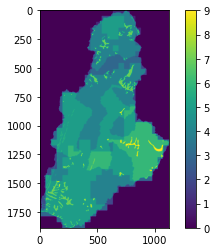

In [6]:
# plot theoretically homogeneous zones of sota
plt.imshow(band)
plt.colorbar()

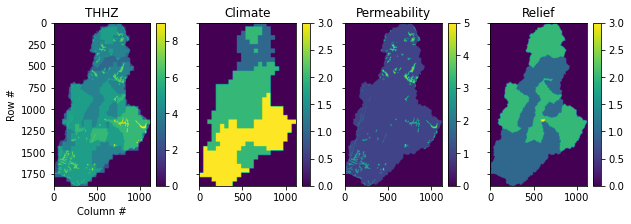

In [7]:
# plot all bands
fig, axes = plt.subplots(1,4, figsize=(10,3), sharex=True, sharey=True)

plt.sca(axes[0])
plt.imshow(band)
plt.colorbar()
plt.title('THHZ')
plt.xlabel('Column #')
plt.ylabel('Row #')

plt.sca(axes[1])
plt.imshow(band_c)
plt.colorbar()
plt.title('Climate')

plt.sca(axes[2])
plt.imshow(band_p)
plt.colorbar()
plt.title('Permeability')

plt.sca(axes[3])
plt.imshow(band_r)
plt.colorbar()
plt.title('Relief')
plt.savefig('./images/thhz.png')

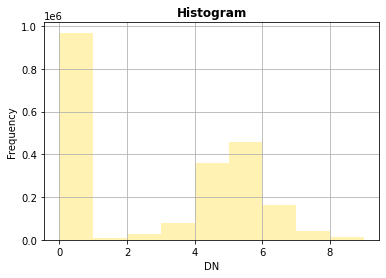

In [8]:
# plot histogram
fig, axhist = plt.subplots(1, 1)
show_hist(band, bins=9, ax=axhist, alpha=0.3, title='Histogram')
axhist.get_legend().remove()

In [9]:
# save thhz
thhz = rasterio.open('./data/output/thhz.tif', 'w', driver='GTiff',
                            height = band.shape[0], width = band.shape[1],
                            count=1, dtype=str(band.dtype),
                            crs='EPSG:4326',
                            transform= Affine(0.001, 0.0, 2.616837667, 0.0, -0.001, 11.815923996))
thhz.write(band, 1)
thhz.close()

In [10]:
# compute difference between neighboring cells
diff_band = np.diff(band, axis = 1)

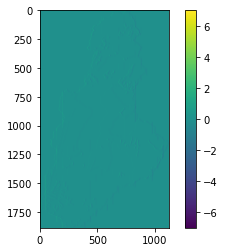

In [11]:
# plot thhz difference
plt.imshow(diff_band)
plt.colorbar()

In [12]:
# save thhz diff
thhz_diff = rasterio.open('./data/output/thhz_diff.tif', 'w', driver='GTiff',
                            height = diff_band.shape[0], width = diff_band.shape[1],
                            count=1, dtype=str(diff_band.dtype),
                            crs='EPSG:4326',
                            transform= Affine(0.001, 0.0, 2.616837667, 0.0, -0.001, 11.815923996))
thhz_diff.write(diff_band, 1)
thhz_diff.close()